In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [3]:
method = 'cicso0'
instruments = 'ims'
period = 5

In [4]:
dirs = os.path.join(base_path, method, instruments, 'temp', "tree",
                        str(period))

In [5]:
filename = os.path.join(dirs, "predict_data.feather")

In [6]:
predict_data = pd.read_feather(filename)
predict_data#.head()

,trade_time,code,nxt1_ret_5h,predict
0,2024-12-05 10:20:00,IM,-0.001860,-0.000027
1,2024-12-05 10:21:00,IM,-0.000716,-0.000025
2,2024-12-05 10:22:00,IM,-0.001164,-0.000035
3,2024-12-05 10:23:00,IM,-0.000192,-0.000054
4,2024-12-05 10:24:00,IM,-0.000006,-0.000048
...,...,...,...,...
15066,2025-03-12 14:56:00,IM,-0.000430,-0.000030
15067,2025-03-12 14:57:00,IM,-0.000962,-0.000030
15068,2025-03-12 14:58:00,IM,-0.001057,-0.000030
15069,2025-03-12 14:59:00,IM,-0.002541,-0.000031


In [7]:
from lib.cux001 import FactorEvaluate1

In [8]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression='weight')

In [9]:
stats_dt = evaluate1.run()

In [10]:
stats_dt

{'total_ret': 0.09112920852163486,
 'avg_ret': 6.1304584823573776e-06,
 'max_dd': -0.0841856539812813,
 'calmar': 1.0824790711003738,
 'sharpe1': 0.008668899112890564,
 'sharpe2': 1.1331167904805581,
 'turnover': 0.21096794099753288,
 'win_rate': 0.4892840554707717,
 'profit_ratio': 1.0408080824998005,
 'ic_mean': 0.014765338537703098,
 'ic_std': 0.10402073406672385,
 'ic_ir': 0.14194610978453495,
 'factor_autocorr': 0.36910906769914203,
 'ret_autocorr': 0.818208807037173}

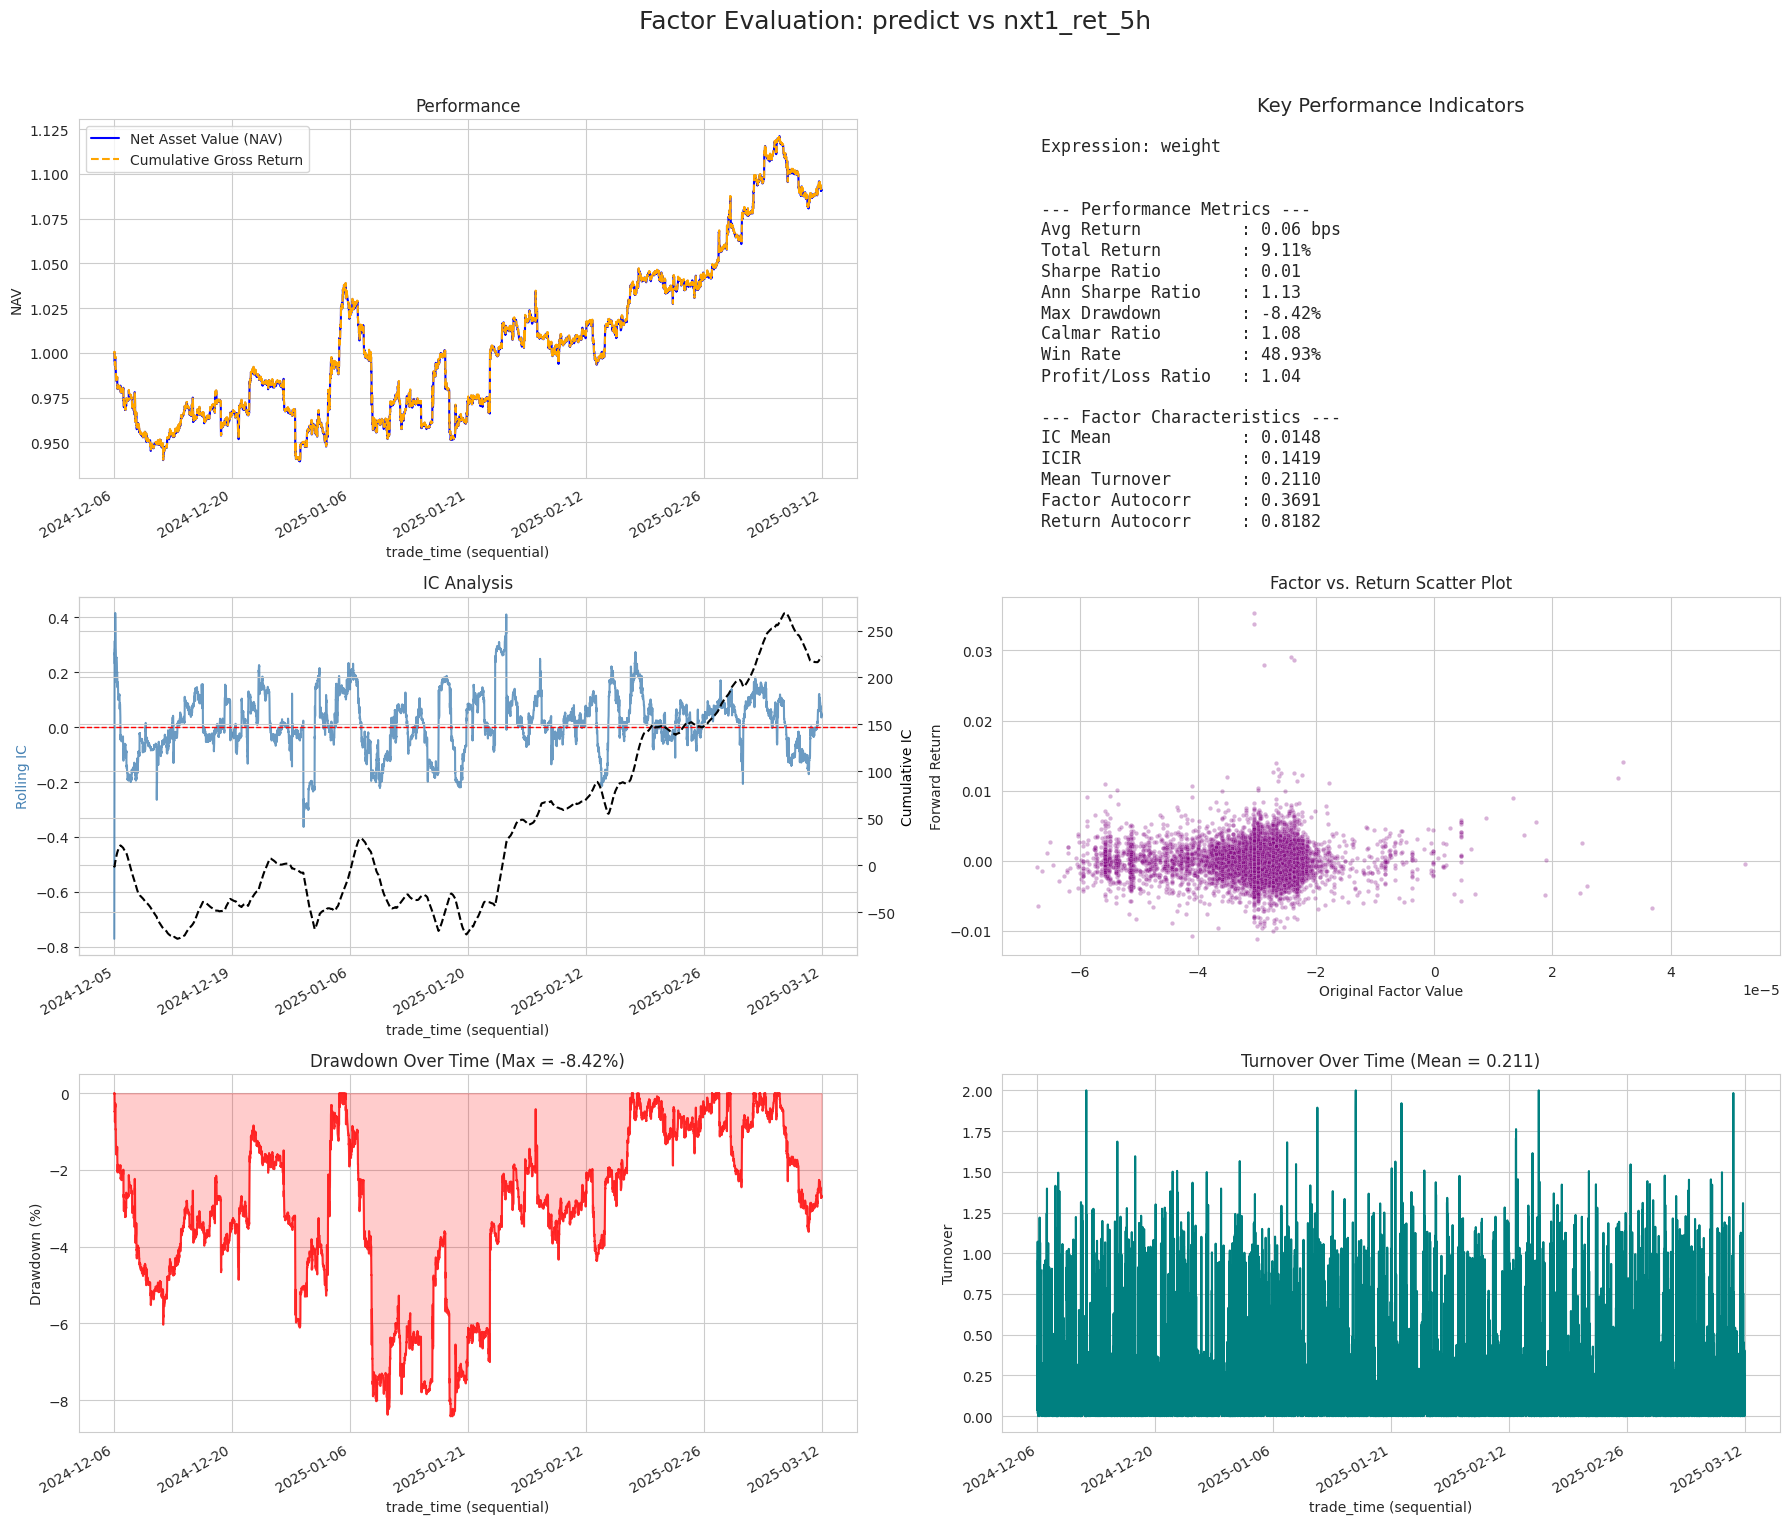

In [11]:
evaluate1.plot_results()